Tampilan beberapa baris pertama data:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00      

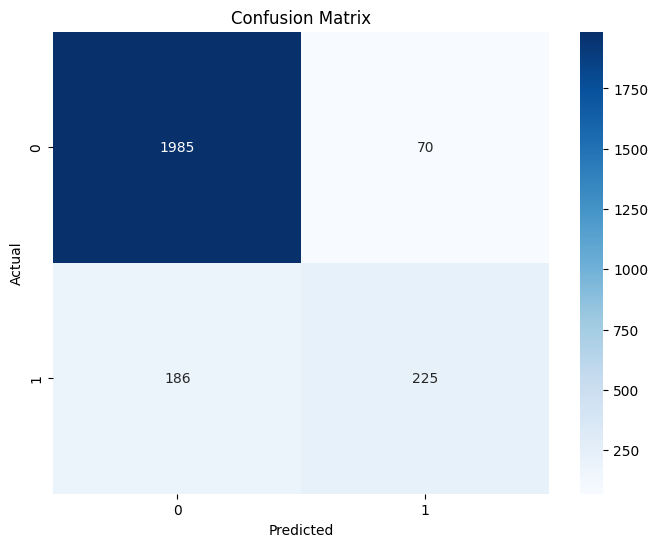

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Langkah 1: Baca dataset
file_path = '/content/online_shoppers_intention[1].csv'
df = pd.read_csv(file_path)

# Lihat beberapa baris data pertama
print("Tampilan beberapa baris pertama data:")
print(df.head())

# Langkah 2: Pra-pemrosesan Data

# Cek missing values
print("\nCek missing values:")
print(df.isnull().sum())

# Mengubah tipe data kategorikal menjadi numerik menggunakan LabelEncoder
label_encoder = LabelEncoder()

# Proses encoding pada semua kolom yang bertipe data object
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Pisahkan fitur dan label (target)
X = df.drop('Revenue', axis=1)  # Sesuaikan dengan target kolom (misalnya 'Revenue')
y = df['Revenue']

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Langkah 3: Membuat Model

# Inisialisasi model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training model
model.fit(X_train_scaled, y_train)

# Prediksi pada data test
y_pred = model.predict(X_test_scaled)

# Langkah 4: Evaluasi Model

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAkurasi: {accuracy * 100:.2f}%')

# Laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matriks kebingungan (confusion matrix)
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
